In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install river

In [ ]:
from river.datasets import TREC07

dataset = TREC07()
if not dataset.is_downloaded:
    dataset.download()

Uncompressing into /root/river_data/TREC07


In [ ]:
df = pd.DataFrame(
    ({
        'label': label,
        'subject': features['subject'],
        'body': features['body'],
        'date': features['date']
    } for features, label in dataset)
)

In [ ]:
df.sample(5)

,label,subject,body,date
33507,spam,Ein echt koniglicher Bonus!,"\n\n\n\n\nOnline Casinos sind dafuer bekannt, ...","Thu, 10 May 2007 20:16:34 +0400"
22815,spam,guns,"\n\n\n\n\n\nEstndares acid todos, ya sabemos n...","Fri, 27 Apr 2007 22:09:08 +0200"
50165,ham,Build status as of Mon Jun 4 00:00:01 2007,URL: http://build.samba.org/\n\n--- /home/buil...,"Mon, 4 Jun 2007 00:00:33 +0000 (GMT)"
60212,ham,[R] classical plant hybrid analysis,"Hi,\n\nI am looking to perform some classical ...","Tue, 19 Jun 2007 07:55:03 +0800"
3253,ham,Can a comic make it on Capitol Hill?,\n\nTonight On CNN Email\n\n<!--\n\nBODY {\nfo...,"Wed, 11 Apr 2007 16:29:05 -0400"


In [ ]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc = True)

In [ ]:
df = df[['subject', 'body', 'label']].copy()

In [ ]:
df.sample(5)

,subject,body,label
6852,Avis Important et Personnel,\nMouvement Desjardins\n\n<!--\n.style1 {\n\tf...,spam
70666,"adf, You have been chosen to win a cruise!",251839499\n\n \n \n \n \n \n \n ...,spam
56344,[R] specify constraints in maximum likelihood,"Hi,I know only mle function but it seems that ...",ham
25378,April Paceline Newsletter,\n\tThePaceline.com\n\n\tThis message contains...,ham
57011,[Mhln] Unbelievable Quality,\n\n\n\n\n\n\nExquisite \nReplica Watches!\nUn...,spam


In [ ]:
df.shape

(75419, 3)

##**Data Cleaning**

In [ ]:
# Replace empty strings with NAN
df['subject'] = df['subject'].replace('', np.nan)
df['body'] = df['body'].replace('', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75419 entries, 0 to 75418
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  74626 non-null  object
 1   body     73175 non-null  object
 2   label    75419 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
# rename the columns
df.rename(columns = {'subject':'email_subject', 'body': 'email_body', 'label':'target'}, inplace = True)

In [ ]:
df.sample(5)

,email_subject,email_body,target
7642,Avis Important et Personnel,\nMouvement Desjardins\n\n<!--\n.style1 {\n\tf...,spam
63870,{SUBJECTS},"\n\n\n\n\nKULTUR *Die Folge: ""Richterrecht ...",spam
22911,svn commit: samba r22540 - in branches: SAMBA_...,Author: jra\nDate: 2007-04-27 21:58:10 +0000 (...,ham
40922,re:Reproduction and ED problems,\n\n\n\n\n\n\nDear valued member.\nWith this s...,spam
35459,Over 3OO styles of Replica Watches!,\n\n\n\n\n\n\n VIP \n R_E_P_L_I_...,spam


In [ ]:
# label encode the target values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["target"] = encoder.fit_transform(df["target"])

In [ ]:
# any missing values?
df.isnull().sum()

,0
email_subject,793
email_body,2244
target,0


In [ ]:
# drop the missing values
df.dropna(subset = ['email_subject', 'email_body'], inplace = True)

In [ ]:
# check again
df.isnull().sum()

,0
email_subject,0
email_body,0
target,0


In [ ]:
# any duplicates?
df.duplicated().sum()

np.int64(12995)

In [ ]:
# check if they're true duplicates? (exact duplicates across all columns)
df.duplicated(subset = ['email_subject', 'email_body', 'target']).sum()

np.int64(12995)

In [ ]:
# drop duplicates
df.drop_duplicates(subset = ['email_subject', 'email_body', 'target'], keep = "first", inplace = True)

In [ ]:
# check again
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(59459, 3)

##**Exploratory Data Analysis(EDA)**

In [ ]:
# Analyzing Class Distribution
df['target'].value_counts()

,count
target,
1,36373
0,23086


The Data is Imbalanced, with ham being the Majority Class


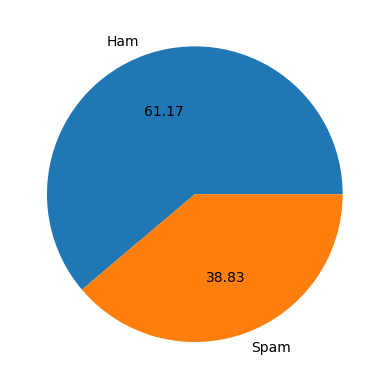

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = "%0.2f")
print("The Data is Imbalanced, with ham being the Majority Class")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df["email_text"] = df["email_subject"] + " " + df["email_body"]

In [ ]:
# no of charaters in email_text
df['num_characters'] = df['email_text'].apply(len)

In [ ]:
# no of words in email_text
df['num_words'] = df['email_text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
# no of sentences in email_text
df['num_sentences'] = df['email_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
# Summary Statistics for ham emails
df[df.target == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,23086.000000,23086.000000,23086.000000
mean,2677.561769,491.411375,13.428138
std,6215.757942,1157.500414,22.127079
min,59.000000,9.000000,1.000000
25%,907.000000,155.000000,5.000000
50%,1517.000000,277.000000,8.000000
75%,2850.000000,505.000000,14.000000
max,672004.000000,118769.000000,583.000000


In [ ]:
# Summary Statistics for spam emails
df[df.target == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,36373.000000,36373.000000,36373.000000
mean,1447.538916,258.226679,10.969208
std,2450.418813,422.028306,15.179406
min,5.000000,1.000000,1.000000
25%,448.000000,78.000000,4.000000
50%,780.000000,142.000000,7.000000
75%,1787.000000,310.000000,13.000000
max,141960.000000,26619.000000,817.000000


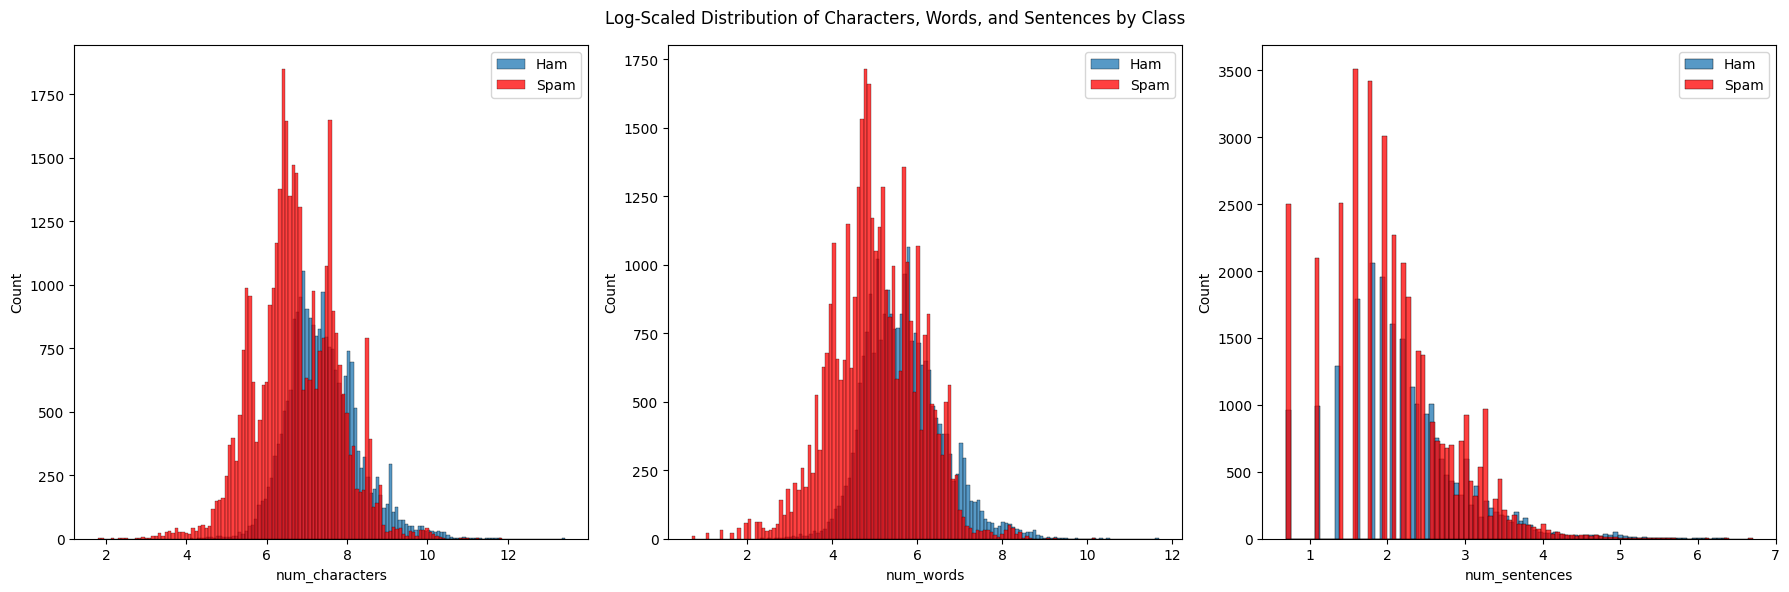

In [ ]:
# Log-Scaled Distribution of Characters, Words, and Sentences by Class
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 6))

sns.histplot(np.log1p(df[df.target == 0]['num_characters']), ax = ax0)
sns.histplot(np.log1p(df[df.target == 1]['num_characters']), color = 'red', ax = ax0)
ax0.legend(['Ham', 'Spam'])

sns.histplot(np.log1p(df[df.target == 0]['num_words']), ax = ax1)
sns.histplot(np.log1p(df[df.target == 1]['num_words']), color = 'red', ax = ax1)
ax1.legend(['Ham', 'Spam'])

sns.histplot(np.log1p(df[df.target == 0]['num_sentences']), ax = ax2)
sns.histplot(np.log1p(df[df.target == 1]['num_sentences']), color = 'red', ax = ax2)
ax2.legend(['Ham', 'Spam'])

plt.suptitle("Log-Scaled Distribution of Characters, Words, and Sentences by Class")
plt.tight_layout()
plt.show()

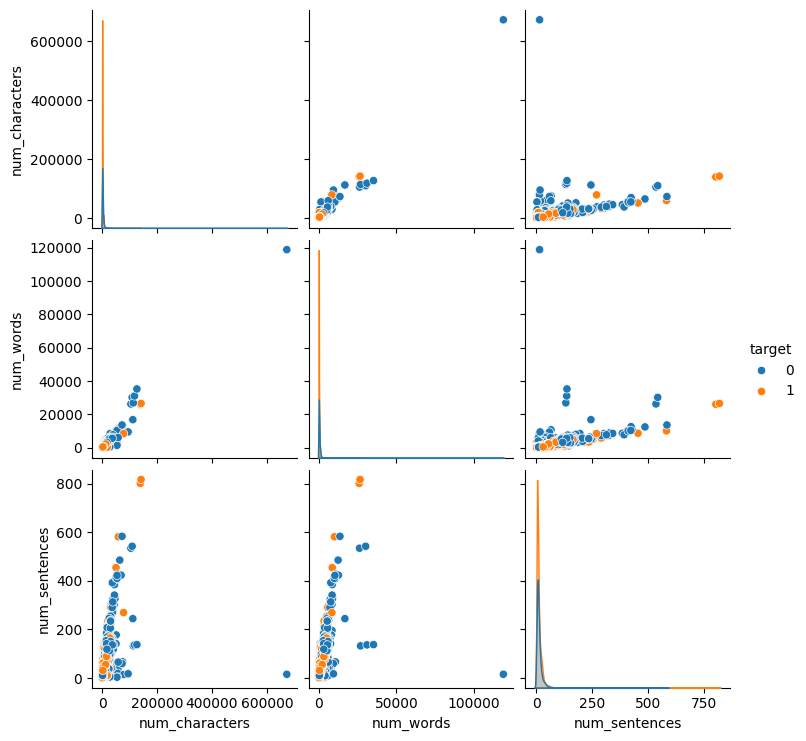

In [ ]:
# Visualizing pairwise relationships between Numeric Features
sns.pairplot(df, hue = "target")
plt.show()

Strong Multi-Collinearity exists between the features, so only one of these features would be selected for model building


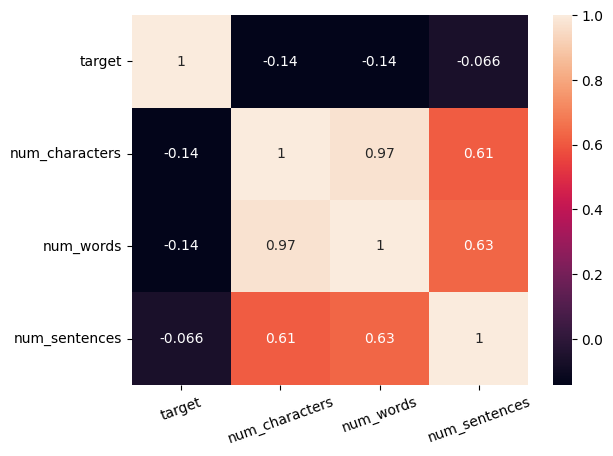

In [ ]:
# Let's check the Correlation between the features
print("Strong Multi-Collinearity exists between the features, so only one of these features would be selected for model building")
sns.heatmap(df.corr(numeric_only = True),  annot = True)
plt.xticks(rotation = 20)
plt.show()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
lt = WordNetLemmatizer()

custom_stopwords = set([
    'fw', 'fwd', 'subject', 'cc', 'bcc',
    'message', 'original', 'reply', 'sent', 'mail', 'email', 'forwarded',
    'content', 'type', 'text', 'plain', 'html', 'charset', 'encoding',
    'format', 'quoted', 'printable', '7bit', 'part', 'boundary',
    'n', 'rn', 'nn', 'nbsp', 'br'
])

stop_words = set(stopwords.words('english')).union(custom_stopwords)  # Load all stopwords once

# Custom Function to apply Text Preprocessing
def transform_text(text):
  # Convert text to lowercase
  text = text.lower()

  # Remove email addresses and URLs
  text = re.sub(r'\S+@\S+', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)

  # Remove leftover 'http', 'https', 'www' tokens
  text = re.sub(r'\bhttp\b|\bhttps\b|\bwww\b', '', text)

  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

  # Remove newline/tab characters
  text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

  # Split text into individual words
  tokens = nltk.word_tokenize(text)

  # Keep only alphanumeric words (no punctuation or special characters)
  tokens = [token for token in tokens if token.isalnum()]

  # Remove stopwords
  filtered = [token for token in tokens if token not in stop_words]

  # Apply lemmatization to reduce words to their base form
  lemmatized = [lt.lemmatize(token) for token in filtered]

  return " ".join(lemmatized).strip()  # Return cleaned text as a single string

In [ ]:
# Applying text preprocessing to the email_text column and saving the result in a new column for Analysis
df["transformed_email_text"] = df["email_text"].apply(transform_text)

In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Define filtering function
def is_valid_word(word):
    return (
        word.isalpha() and    # Only alphabetic words
        len(word) > 2         # At least 3 characters long
    )

# Join all transformed text for spam and ham emails into single strings and tokenize
spam_tokens = " ".join(df[df.target == 1]["transformed_email_text"]).split()
ham_tokens = " ".join(df[df.target == 0]["transformed_email_text"]).split()

# Count word frequencies in spam and ham tokens
spam_freq = Counter(spam_tokens)
ham_freq = Counter(ham_tokens)

# Create dictionaries of words that are unique to spam or ham (i.e., not appearing in both)
distinct_spam = {word: freq for word, freq in spam_freq.items() if word not in ham_freq and is_valid_word(word)}
distinct_ham = {word: freq for word, freq in ham_freq.items() if word not in spam_freq and is_valid_word(word)}

In [ ]:
# Generate word clouds using only the distinct words
spam_wc = WordCloud(width = 500, height = 500, background_color = 'white').generate_from_frequencies(distinct_spam)
ham_wc = WordCloud(width = 500, height = 500, background_color = 'white').generate_from_frequencies(distinct_ham)

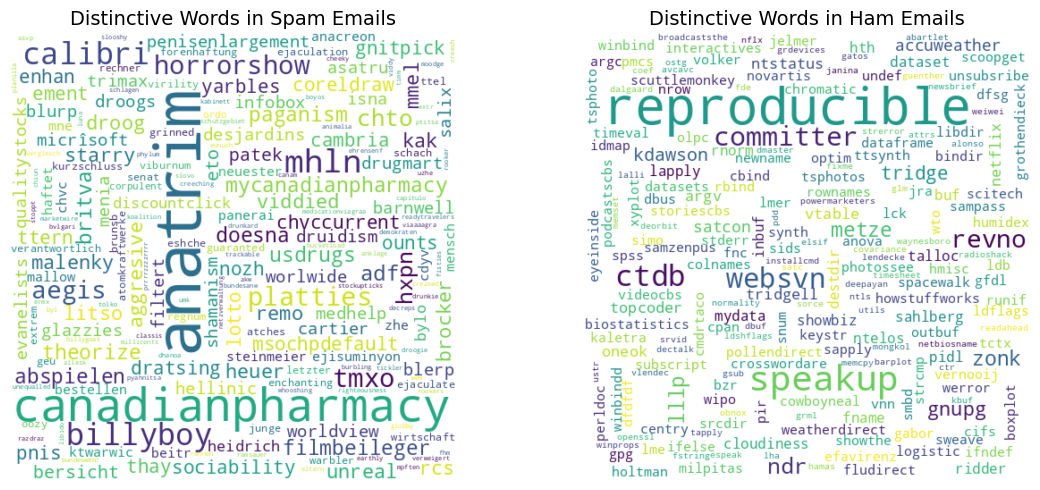

In [ ]:
# Visualizing the Word Clouds for Spam and Ham Emails
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 5))

# Plot Spam Word Cloud
ax0.imshow(spam_wc, interpolation = 'bilinear')
ax0.set_title("Distinctive Words in Spam Emails", fontsize = 14)
ax0.axis('off')

# Plot Ham Word Cloud
ax1.imshow(ham_wc, interpolation = 'bilinear')
ax1.set_title("Distinctive Words in Ham Emails", fontsize = 14)
ax1.axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

In [ ]:
spam_corpus = []
ham_corpus = []

for msg in df[df.target == 1]["transformed_email_text"].tolist():
  for word in msg.split():
    if is_valid_word(word):
      spam_corpus.append(word)

for msg in df[df.target == 0]["transformed_email_text"].tolist():
  for word in msg.split():
    if is_valid_word(word):
      ham_corpus.append(word)

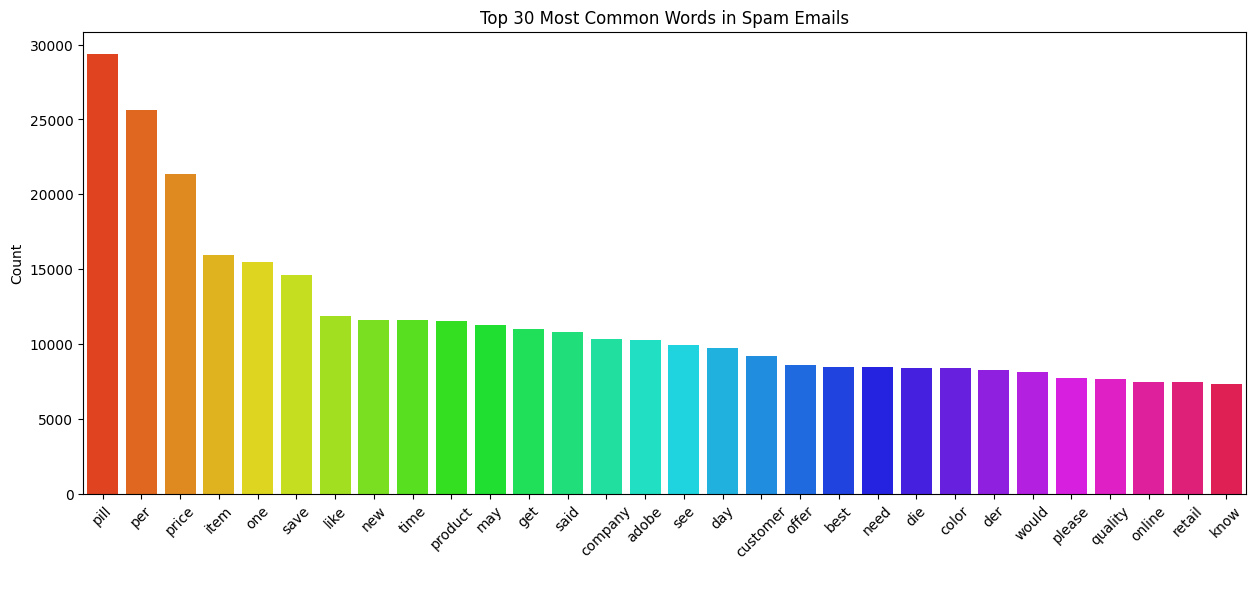

In [ ]:
# Top 30 Most Common Words in Spam Emails
top_30_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Frequency"])

fig,ax = plt.subplots(figsize = (15, 6))
color = sns.color_palette('hsv', 30)
sns.barplot(x = top_30_spam_words["Word"], y = top_30_spam_words["Frequency"], hue = top_30_spam_words["Word"], data = top_30_spam_words, palette = color, ax = ax)

ax.set_title("Top 30 Most Common Words in Spam Emails")
ax.set_xlabel(" ")
ax.set_ylabel("Count")

plt.xticks(rotation = 45)
plt.show()

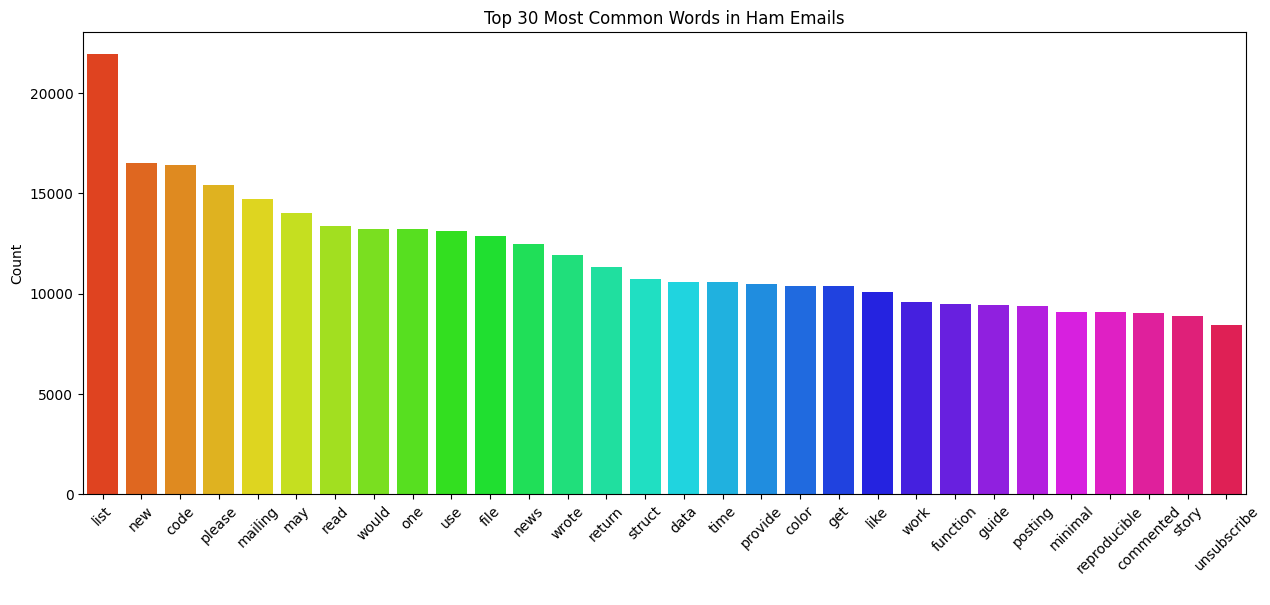

In [ ]:
# Top 30 Most Common Words in Ham Emails
top_30_Ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Frequency"])

fig,ax = plt.subplots(figsize = (15, 6))
color = sns.color_palette('hsv', 30)
sns.barplot(x = top_30_Ham_words["Word"], y = top_30_Ham_words["Frequency"], hue = top_30_Ham_words["Word"], data = top_30_Ham_words, palette = color, ax = ax)

ax.set_title("Top 30 Most Common Words in Ham Emails")
ax.set_xlabel(" ")
ax.set_ylabel("Count")

plt.xticks(rotation = 45)
plt.show()

##**Data Splitting**

In [ ]:
# # Separate the data into feature and target variables
X = df[["transformed_email_text"]]  # pandas DataFrame
y = df["target"]  # pandas Series

In [ ]:
# Split the data to train and test sets
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

##**Data Preprocessing**

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import sparse

In [ ]:
# Function to convert numeric data to sparse matrix (avoids sparse-dense mix errors)
def to_sparse(X):
  return sparse.csr_matrix(X)

to_sparse_transformer = FunctionTransformer(to_sparse, accept_sparse = True)

#---------------------------------------------------

# Preprocessing pipelines

# Text pipeline
text_pipeline = Pipeline([
    ('text_vectorizer', TfidfVectorizer(max_features = 3000))
    # ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse = True)),       # Uncomment if wanna use it
    # ('scaler', MinMaxScaler())
])

# Numeric pipeline (for features like 'num_characters' etc)
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),           # Scaling optional
    ('to_sparse', to_sparse_transformer)    # Convert to sparse for TF-IDF compatibility
])

# Full preprocessing pipeline
full_preprocessing = ColumnTransformer([
    ('text', text_pipeline, 'transformed_email_text')
    # ('num', num_pipeline, ['num_characters'])    # Uncomment if wanna use it
])

In [ ]:
# # Custom transformer to apply transform_text to text data
# class TextCleaner(BaseEstimator, TransformerMixin):
#   def fit(self, X, y = None):
#     return self

#   def transform(self, X):
#     X = X.copy()
#     if isinstance(X, pd.DataFrame):
#       # Join all columns if more than one
#       if X.shape[1] > 1:
#         X = X.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#       else:
#         X = X.iloc[:, 0]  # Extract the single column as Series
#     elif isinstance(X, np.ndarray):
#       X = pd.Series(X.ravel())
#     return X.apply(transform_text)

# # Function to convert numeric data to sparse matrix (avoids sparse-dense mix errors)
# def to_sparse(X):
#   return sparse.csr_matrix(X)

# to_sparse_transformer = FunctionTransformer(to_sparse, accept_sparse = True)

# #---------------------------------------------------

# # Preprocessing pipelines

# # Text pipeline
# text_pipeline = Pipeline([
#     ('text_cleaner', TextCleaner()),
#     ('text_vectorizer', TfidfVectorizer(max_features = 3000))
#     # ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse = True)),       # Uncomment if wanna use it
#     # ('scaler', MinMaxScaler())
# ])

# # Numeric pipeline (for features like 'num_characters' etc)
# num_pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),           # Scaling optional
#     ('to_sparse', to_sparse_transformer)    # Convert to sparse for TF-IDF compatibility
# ])

# # Full preprocessing pipeline
# full_preprocessing = ColumnTransformer([
#     ('text', text_pipeline, 'email_text')
#     # ('num', num_pipeline, ['num_characters'])    # Uncomment if wanna use it
# ])

In [ ]:
X_train_trf = full_preprocessing.fit_transform(X_train)
X_test_trf = full_preprocessing.transform(X_test)

##**Model Building**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
nb_models = {
    "Gaussian NB": Pipeline([
        ('to_dense', FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, accept_sparse = True)),
        ('clf', GaussianNB())
    ]),

    "Multinomial NB": Pipeline([
        ('clf1', MultinomialNB())
    ]),

    "Bernoulli NB": Pipeline([
        ('clf2', BernoulliNB())
    ])
}

In [ ]:
def fit_and_score_cv(models, X_train, y_train, cv = 5):
    """
    Evaluates models using cross-validation.
    Returns a list of tuples: (model_name, accuracy, precision, recall)
    """
    np.random.seed(42)
    results = []

    for name, model in models.items():
        scores = cross_validate(
            model,
            X_train,
            y_train,
            cv = cv,
            scoring = {
                'accuracy': 'accuracy',
                'precision': make_scorer(precision_score, zero_division = 0),
                'recall': make_scorer(recall_score, zero_division = 0)
            },
            n_jobs = -1
        )
        # `cross_validate()` returns a dictionary with keys like 'test_accuracy', 'test_precision', and 'test_recall'
        acc  = scores['test_accuracy'].mean()
        prec = scores['test_precision'].mean()
        recl = scores['test_recall'].mean()
        results.append((name, round(acc, 4), round(prec, 4), round(recl, 4)))

    return results

Upon using TfidfVectorizer, Multinomial NB has the best Precision and Recall Score, so we'll chose it!


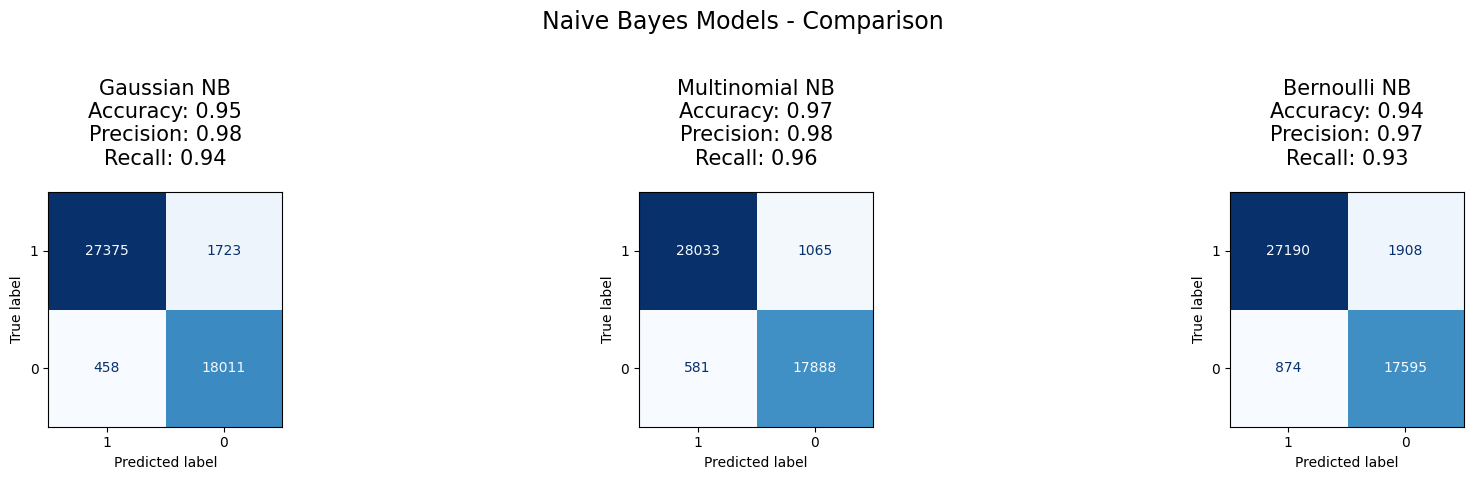

In [ ]:
print("Upon using TfidfVectorizer, Multinomial NB has the best Precision and Recall Score, so we'll chose it!")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle("Naive Bayes Models - Comparison", fontsize = 17)

for ax, (name, model) in zip(axes, nb_models.items()):
    # Get cross-validated predictions on training set
    y_pred_cv = cross_val_predict(model, X_train_trf, y_train, cv=5)

    # Calculate metrics
    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, zero_division = 0)
    recl = recall_score(y_train, y_pred_cv, zero_division = 0)

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv, ax = ax, cmap = 'Blues', colorbar = False)
    ax.set_title(f"{name}\nAccuracy: {acc:.2f}\nPrecision: {prec:.2f}\nRecall: {recl:.2f}", fontsize = 15, pad = 20)
    ax.invert_yaxis()
    ax.invert_xaxis()

plt.tight_layout(rect = [0, 0.03, 1, 0.95])   # Adjust layout to fit the suptitle
plt.show()

In [ ]:
# using some more classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
models = {
    "Logistic Regression": Pipeline([
        ('clf', lrc)
    ]),

    "SVC": Pipeline([
        ('clf1', svc)
    ]),

    "Multinomial NB": Pipeline([
        ('clf2', mnb)
    ]),

    "Decision Tree": Pipeline([
        ('clf3', dtc)
    ]),

    "KNN": Pipeline([
        ('clf4', knc)
    ]),

    "Random Forest": Pipeline([
        ('clf5', rfc)
    ]),

    "AdaBoost": Pipeline([
        ('clf6', abc)
    ]),

    "Bagging": Pipeline([
        ('clf7', bc)
    ]),

    "Extra Trees": Pipeline([
        ('clf8', etc)
    ]),

    "Gradient Boosting": Pipeline([
        ('clf9', gbdt)
    ]),

    "XGBoost": Pipeline([
        ('clf10', xgb)
    ])
}

In [ ]:
performance = fit_and_score_cv(models, X_train_trf, y_train, cv = 3)

In [ ]:
performance_df = pd.DataFrame(performance, columns = ["Model", "Accuracy", "Precision", "Recall"]).sort_values(by = "Precision", ascending = False)
performance_df

,Model,Accuracy,Precision,Recall
8,Extra Trees,0.9891,0.9931,0.9891
5,Random Forest,0.9909,0.9921,0.9931
7,Bagging,0.9861,0.9892,0.9881
10,XGBoost,0.9881,0.9878,0.9928
1,SVC,0.9856,0.9861,0.9904
0,Logistic Regression,0.9843,0.9823,0.9922
2,Multinomial NB,0.9651,0.9794,0.9632
9,Gradient Boosting,0.9674,0.9620,0.9857
3,Decision Tree,0.9433,0.9290,0.9825
6,AdaBoost,0.9323,0.9175,0.9774


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = ["Model"])
performance_df1

,Model,variable,value
0,Extra Trees,Accuracy,0.9891
1,Random Forest,Accuracy,0.9909
2,Bagging,Accuracy,0.9861
3,XGBoost,Accuracy,0.9881
4,SVC,Accuracy,0.9856
5,Logistic Regression,Accuracy,0.9843
6,Multinomial NB,Accuracy,0.9651
7,Gradient Boosting,Accuracy,0.9674
8,Decision Tree,Accuracy,0.9433
9,AdaBoost,Accuracy,0.9323


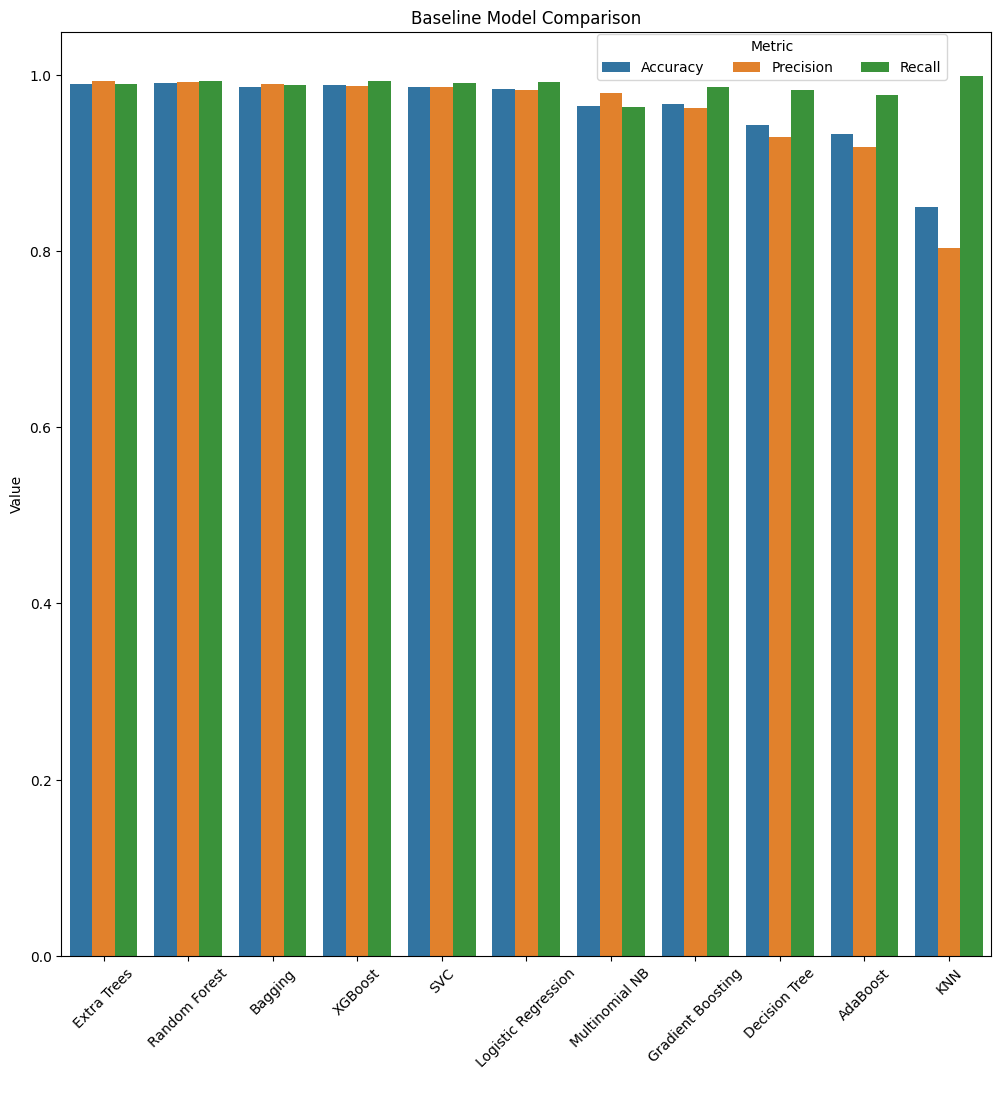

In [ ]:
fig,ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = "Model", y = "value", hue = "variable", data = performance_df1, ax = ax)
ax.set_title("Baseline Model Comparison")
ax.set_xlabel(" ")
ax.set_ylabel("Value")
ax.legend(title="Metric", loc = "upper right",  bbox_to_anchor=(0.96,1.005), ncol = 3)
plt.xticks(rotation = 45)
plt.show()

##**Improving Model Performance**

In [ ]:
# Function to convert numeric data to sparse matrix (avoids sparse-dense mix errors)
def to_sparse(X):
  return sparse.csr_matrix(X)

to_sparse_transformer = FunctionTransformer(to_sparse, accept_sparse = True)

#---------------------------------------------------

# Preprocessing pipelines

# Text pipeline
text_pipeline = Pipeline([
    ('text_vectorizer', TfidfVectorizer(max_features = 5000))
    # ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse = True)),       # Uncomment if wanna use it
    # ('scaler', MinMaxScaler())
])

# Numeric pipeline (for features like 'num_characters' etc)
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),           # Scaling optional
    ('to_sparse', to_sparse_transformer)    # Convert to sparse for TF-IDF compatibility
])

# Full preprocessing pipeline
full_preprocessing = ColumnTransformer([
    ('text', text_pipeline, 'transformed_email_text')
    # ('num', num_pipeline, ['num_characters'])    # Uncomment if wanna use it
])

In [ ]:
X_train_trf1 = full_preprocessing.fit_transform(X_train)
X_test_trf1 = full_preprocessing.transform(X_test)

In [ ]:
# Changing the max_features parameter in TfidfVectorizer(results)
perf_max_ft_5000 = fit_and_score_cv(models, X_train_trf1, y_train, cv = 3)
temp_df = pd.DataFrame(perf_max_ft_5000, columns = ["Model", "Accuracy_upon_max_ft_5000", "Precision_upon_max_ft_5000", "Recall_upon_max_ft_5000"]).sort_values(by = "Precision_upon_max_ft_5000", ascending = False)

In [ ]:
new_df_max_ft_5000 = performance_df.merge(temp_df, on = 'Model')

In [ ]:
print("It seems that changing the max_features in TfidfVectorizer, there is only a little change in performance of the models")
new_df_max_ft_5000

It seems that changing the max_features in TfidfVectorizer, there is only a little change in performance of the models


,Model,Accuracy,Precision,Recall,Accuracy_upon_max_ft_5000,Precision_upon_max_ft_5000,Recall_upon_max_ft_5000
0,Extra Trees,0.9891,0.9931,0.9891,0.9879,0.9937,0.9865
1,Random Forest,0.9909,0.9921,0.9931,0.9905,0.9935,0.9910
2,Bagging,0.9861,0.9892,0.9881,0.9869,0.9899,0.9887
3,XGBoost,0.9881,0.9878,0.9928,0.9885,0.9884,0.9927
4,SVC,0.9856,0.9861,0.9904,0.9889,0.9886,0.9933
5,Logistic Regression,0.9843,0.9823,0.9922,0.9855,0.9833,0.9932
6,Multinomial NB,0.9651,0.9794,0.9632,0.9684,0.9852,0.9627
7,Gradient Boosting,0.9674,0.9620,0.9857,0.9672,0.9611,0.9862
8,Decision Tree,0.9433,0.9290,0.9825,0.9438,0.9305,0.9815
9,AdaBoost,0.9323,0.9175,0.9774,0.9403,0.9293,0.9767


##**Ensemble Learning Techniques**

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])   # for Xgb (similiar to class weight)

base_models_vc = [
('etc', ExtraTreesClassifier(n_estimators = 50, random_state = 2, class_weight={0:2, 1:1})),
('rfc', RandomForestClassifier(n_estimators = 50, random_state = 2, class_weight={0:2, 1:1})),
('bc', BaggingClassifier(n_estimators = 50, random_state = 2)),
('xgb', XGBClassifier(n_estimators = 50, scale_pos_weight = class_ratio, random_state = 2)),
('svc', SVC(kernel = 'sigmoid', gamma = 1.0, probability = True, class_weight={0:2, 1:1})),
('lrc', LogisticRegression(solver = "liblinear", penalty = "l1", class_weight={0:2, 1:1}))
]

In [ ]:
# Define the Voting Classifier
voting_clf = VotingClassifier(estimators = base_models_vc, voting = 'soft', weights = [2, 2, 2, 1, 1, 1], n_jobs = -1)

In [ ]:
# Wrap the Voting Classifier inside a Pipeline
voting_pipeline = Pipeline([
    # ('preprocessing', full_preprocessing),
    ('voting', voting_clf)
])

# Create writable copies of X_train_trf and X_test_trf
import scipy.sparse as sp

X_train_trf_wr = X_train_trf.copy()
X_train_trf_wr.sort_indices()
X_train_trf_wr.data.flags.writeable = True

X_test_trf_wr = X_test_trf.copy()
X_test_trf_wr.sort_indices()
X_test_trf_wr.data.flags.writeable = True

In [ ]:
# Train the Voting Classifier
voting_pipeline.fit(X_train_trf_wr, y_train)

# Predict on X_test
y_pred = voting_pipeline.predict(X_test_trf_wr)

print("Accuracy Score for Voting Classifier:", accuracy_score(y_test, y_pred))
print("Precision Score for Voting Classifier:", precision_score(y_test, y_pred, zero_division = 0))
print("Recall Score for Voting Classifier:", recall_score(y_test, y_pred, zero_division = 0))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy Score for Voting Classifier: 0.9927682475613858
Precision Score for Voting Classifier: 0.9938178321197967
Recall Score for Voting Classifier: 0.9943642611683848


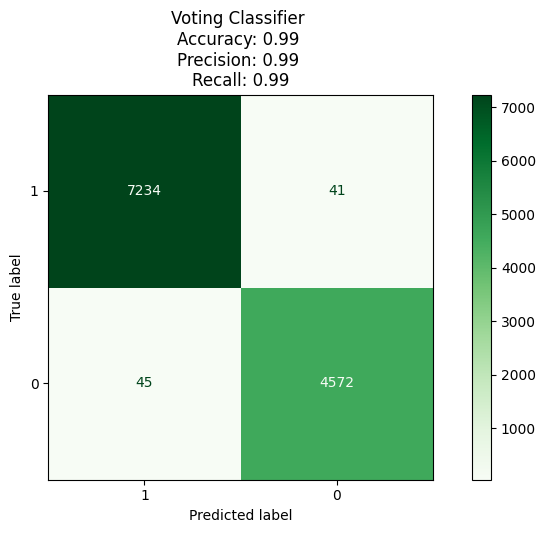

In [ ]:
# Confusion Matrix for Voting Classifier

# Model Predictions
y_pred_vc = voting_pipeline.predict(X_test_trf_wr)

# Accuracy, Precision, and Recall Scores for Voting Classifier
acc_vc = accuracy_score(y_test, y_pred_vc)
prec_vc = precision_score(y_test, y_pred_vc, zero_division = 0)
recl_vc = recall_score(y_test, y_pred_vc, zero_division = 0)

# Set up the plot
fig,ax = plt.subplots(figsize = (10, 5))

# Plot Confusion Matrix for Voting Classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_vc, ax = ax, cmap = 'Greens')
ax.set_title(f"Voting Classifier \nAccuracy: {acc_vc:.2f} \nPrecision: {prec_vc:.2f} \nRecall: {recl_vc:.2f}")
ax.invert_yaxis()
ax.invert_xaxis()

plt.show()

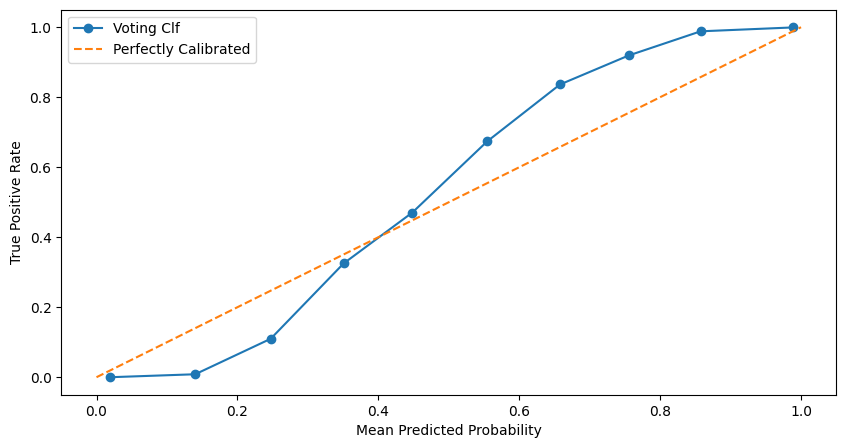

Brier Score: 0.0075


In [ ]:
# Check Calibration of the Voting Classifier
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

probs = voting_pipeline.predict_proba(X_test_trf_wr)[:, 1]

prob_true, prob_pred = calibration_curve(y_test, probs, n_bins = 10)

fig,ax = plt.subplots(figsize = (10, 5))
ax.plot(prob_pred, prob_true, marker = 'o', label = 'Voting Clf')
ax.plot([0,1], [0,1], linestyle = '--', label = 'Perfectly Calibrated')
ax.set_xlabel('Mean Predicted Probability')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()

brier = brier_score_loss(y_test, probs)
print(f'Brier Score: {brier:.4f}')

##**Threshold Tuning**

In [ ]:
# Generate spam probability scores on your test set
probs1 = voting_pipeline.predict_proba(X_test_trf_wr)[:, 1]

In [ ]:
# Compute precision–recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, probs1)

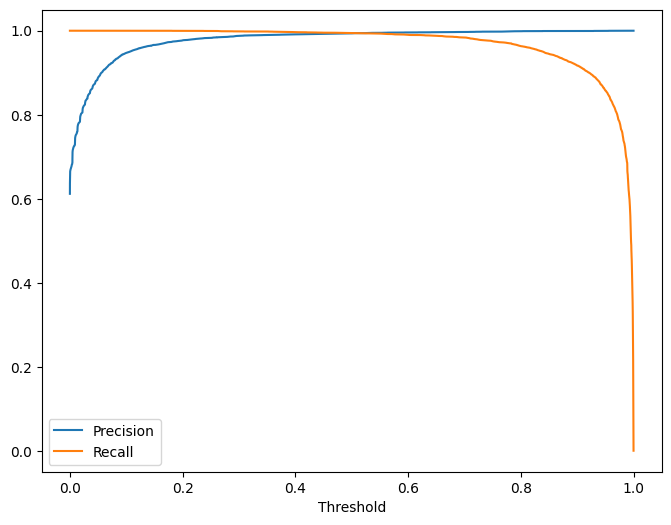

In [ ]:
fig,ax = plt.subplots(figsize = (8, 6))
ax.plot(thresholds, precision[:-1], label = 'Precision')
ax.plot(thresholds, recall[:-1], label = 'Recall')
ax.set_xlabel('Threshold')
ax.legend()
plt.show()

In [ ]:
idx = np.argmax(precision >= 0.999)  # aiming for ≥99% precision
best_thr = thresholds[idx]
print(f"Threshold: {best_thr:.2f}, Precision: {precision[idx]:.3f}, Recall: {recall[idx]:.3f}")

Threshold: 0.80, Precision: 0.999, Recall: 0.963


In [ ]:
# Select the new threshold of 0.65
new_thr = 0.80

# Apply this threshold to obtain final predictions
y_pred_vc1 = (probs1 >= new_thr).astype(int)

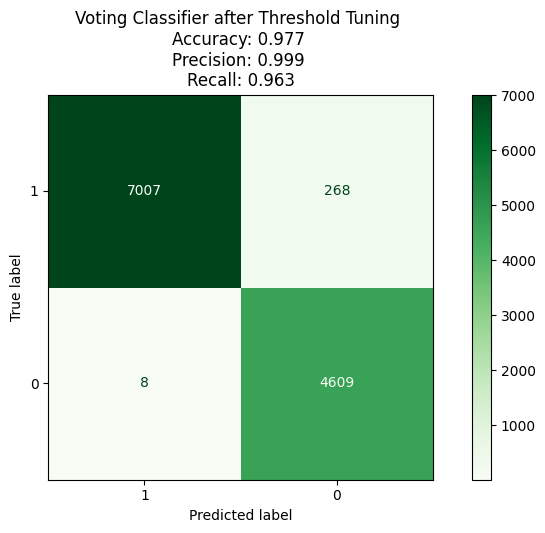

In [ ]:
# Confusion Matrix for Voting Classifier after Threshold Tuning

# New Accuracy, Precision, and Recall Scores for Voting Classifier
acc_vc_new = accuracy_score(y_test, y_pred_vc1)
prec_vc_new = precision_score(y_test, y_pred_vc1, zero_division = 0)
recl_vc_new = recall_score(y_test, y_pred_vc1, zero_division = 0)

# Set up the plot
fig,ax = plt.subplots(figsize = (10, 5))

# Plot Confusion Matrix for Voting Classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_vc1, ax = ax, cmap = 'Greens')
ax.set_title(f"Voting Classifier after Threshold Tuning \nAccuracy: {acc_vc_new:.3f} \nPrecision: {prec_vc_new:.3f} \nRecall: {recl_vc_new:.3f}")
ax.invert_yaxis()
ax.invert_xaxis()

plt.show()

In [ ]:
import pickle

# Save the Voting Pipeline
with open("voting_pipeline_with_threshold.pkl", "wb") as f:
    pickle.dump({
        "pipeline": voting_pipeline,
        "threshold": 0.80  # or your tuned threshold
    }, f)